# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.


---
## Step 0: Load The Data

In [1]:
#Imports 
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle #
from pandas.io.parsers import read_csv
import pandas as pd
import pickle
import time
from datetime import timedelta #
import math
import os
from scipy import ndimage #
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from scipy import misc

In [2]:
#shuffle function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [3]:
##Load pickled data
#load train
training_file = "traffic-sign-data/train.p"
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']
    
    
#load validation    
validation_file= "traffic-sign-data/valid.p"    
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
X_valid, y_valid = valid['features'], valid['labels']

#load test    
testing_file = "traffic-sign-data/test.p"    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)    
X_test, y_test = test['features'], test['labels']

#load signnames CSV
signnames = read_csv("signnames.csv") #.values[:, 1]

#shuffle train and valid sets
sX_train, sy_train = unison_shuffled_copies(X_train, y_train)
sX_valid, sy_valid  = unison_shuffled_copies(X_valid, y_valid)

In [4]:
#Convert to grayscale, (single channel)
#for train set
sgX_train = 0.299 * sX_train[:, :, :, 0] + 0.587 * sX_train[:, :, :, 1] + 0.114 * sX_train[:, :, :, 2]

#for validation set
sX_valid = 0.299 * sX_valid[:, :, :, 0] + 0.587 * sX_valid[:, :, :, 1] + 0.114 * sX_valid[:, :, :, 2]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
##print sets size

nclass = len(np.unique(y_train))
sign_classes, class_indices, class_counts1 = np.unique(y_train, return_index = True, return_counts = True)


print()
print("Image Shape: {}".format(X_train[0].shape))
print("Image Shape after Grayscale: {}".format(sgX_train[0].shape))


print("Number of Class are:", nclass)
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Shuffeld Training Set:   {} samples".format(len(sX_train)))

print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)
Image Shape after Grayscale: (32, 32)
Number of Class are: 43

Training Set:   34799 samples
Shuffeld Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


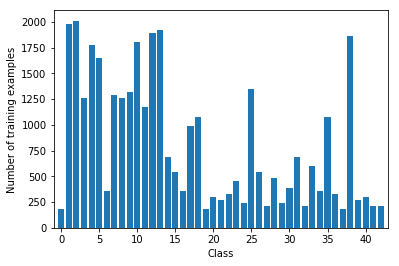

Minimmum count for classes is:  180
Variance of number of examples per class is : 383681.363981


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [6]:
#classes histogram 
plt.bar( np.arange( 43 ), class_counts1 , align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

print("Minimmum count for classes is: ", np.min(class_counts1))
print("Variance of number of examples per class is :", np.var(class_counts1))
signnames

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Orginial Samples 


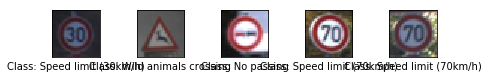

Samples after Preprocessed


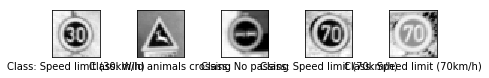

Samples for class Speed limit (20km/h)


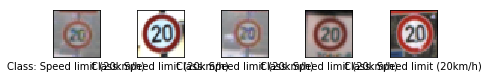

Samples for class Speed limit (30km/h)


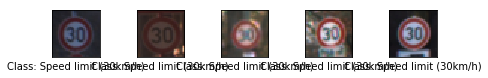

Samples for class Speed limit (50km/h)


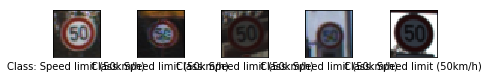

Samples for class Speed limit (60km/h)


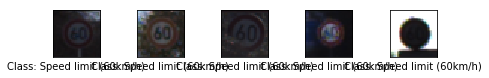

Samples for class Speed limit (70km/h)


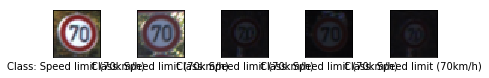

Samples for class Speed limit (80km/h)


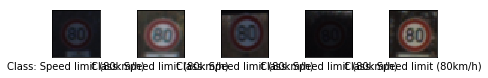

Samples for class End of speed limit (80km/h)


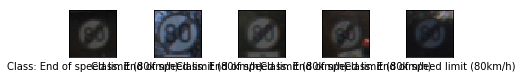

Samples for class Speed limit (100km/h)


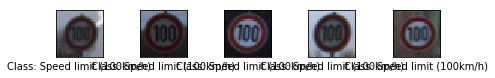

Samples for class Speed limit (120km/h)


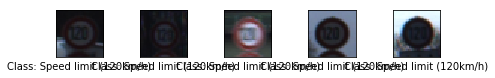

Samples for class No passing


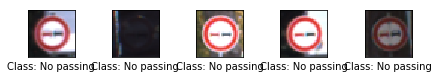

Samples for class No passing for vehicles over 3.5 metric tons


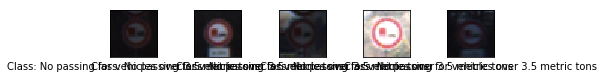

Samples for class Right-of-way at the next intersection


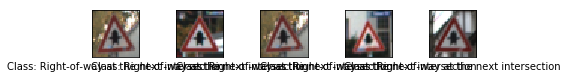

Samples for class Priority road


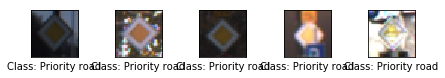

Samples for class Yield


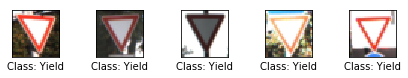

Samples for class Stop


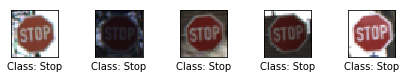

Samples for class No vehicles


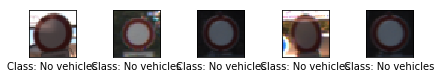

Samples for class Vehicles over 3.5 metric tons prohibited


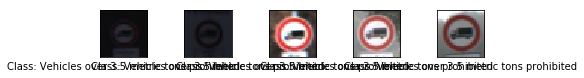

Samples for class No entry


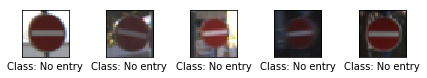

Samples for class General caution


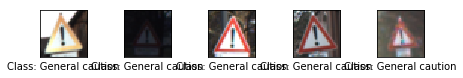

Samples for class Dangerous curve to the left


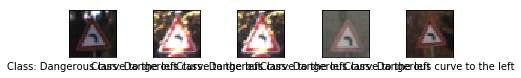

Samples for class Dangerous curve to the right


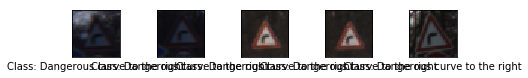

Samples for class Double curve


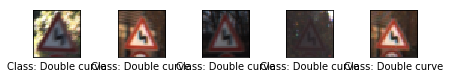

Samples for class Bumpy road


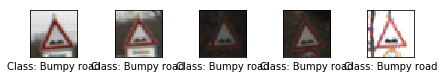

Samples for class Slippery road


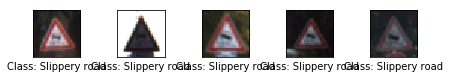

Samples for class Road narrows on the right


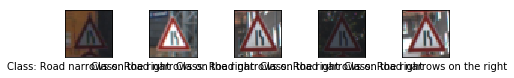

Samples for class Road work


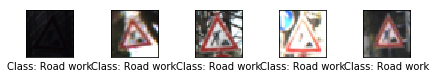

Samples for class Traffic signals


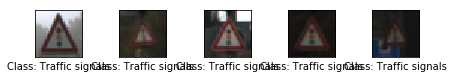

Samples for class Pedestrians


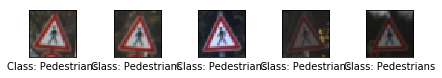

Samples for class Children crossing


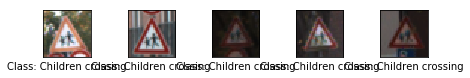

Samples for class Bicycles crossing


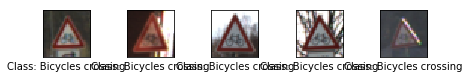

Samples for class Beware of ice/snow


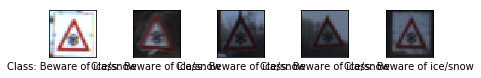

Samples for class Wild animals crossing


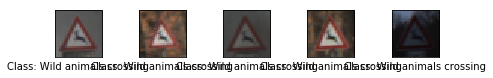

Samples for class End of all speed and passing limits


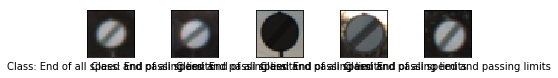

Samples for class Turn right ahead


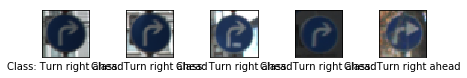

Samples for class Turn left ahead


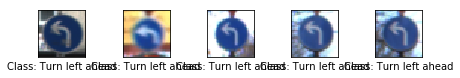

Samples for class Ahead only


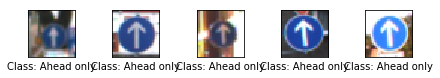

Samples for class Go straight or right


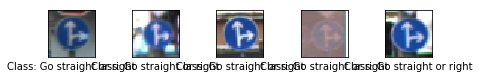

Samples for class Go straight or left


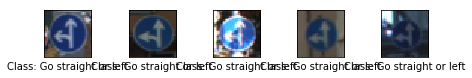

Samples for class Keep right


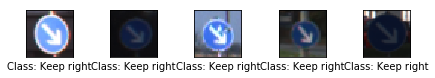

Samples for class Keep left


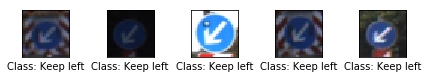

Samples for class Roundabout mandatory


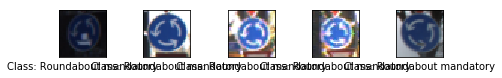

Samples for class End of no passing


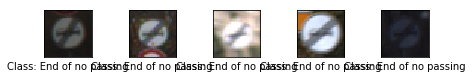

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

##Function to plot examples from data
def plot_images(images, cls_true, cls_pred=None):
    #assert len(images) == len(cls_true) == 4
    
    # Create figure with 2x2 sub-plots.
    fig, axes = plt.subplots(1,5)
    fig.subplots_adjust(hspace=0.3, wspace=3)
    fig.tight_layout()

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "Class: {0}".format(signnames.values[cls_true[i],1])
            

        else:
            xlabel = " Class: {0},  Pred: {1}".format(signnames.values[cls_true[i],1],signnames.values[cls_pred[i],1])


        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    

##Run plot 
# Get the first images from the train-set.
imagesO, imagesG  = sX_train[0:5] , sgX_train[0:5] 

# Get the true classes for those images.
cls_true = sy_train[0:5]

# Plot the images and labels using our helper-function above.
print("Orginial Samples ")
plot_images(images=imagesO, cls_true=cls_true)

print("Samples after Preprocessed")
plot_images(images= imagesG, cls_true=cls_true)


##view 4 samples for all classes
for i in range(0,42):   #42 to show samples for all classes
        itemindex = np.where(sy_train ==i )
        # Get the first images from the train-set
        imagesO  = sX_train[itemindex]
        # Get the true classes for those images
        cls_true = sy_train[sy_train[:] == i]
        print("Samples for class" ,signnames.values[i,1])

        plot_images(images= imagesO, cls_true=cls_true)
        print("========================================================================================")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
###1- Conver RGB to gray scale  (I exceute it above so i will put code here as  a comment)
#for train set
#sgX_train = 0.299 * sX_train[:, :, :, 0] + 0.587 * sX_train[:, :, :, 1] + 0.114 * sX_train[:, :, :, 2]

#for validation set
#sX_valid = 0.299 * sX_valid[:, :, :, 0] + 0.587 * sX_valid[:, :, :, 1] + 0.114 * sX_valid[:, :, :, 2]

###2- Scale Features to be in [1 , 0]
#for train set
sgsfX_train = (sgX_train / 255.).astype(np.float32)

#for validation set
sX_valid = (sX_valid / 255.).astype(np.float32)


###3- reshabe feature ((32,32) result from grayscale) to (32,32,1) to be accepted in CNN 
#for train set
sgsfX_train = sgsfX_train.reshape(sgX_train.shape + (1,)) 

#for validation set 
sX_valid = sX_valid.reshape(sX_valid.shape + (1,)) 


In [9]:
###4- Generate Fake data  (flib )

def flipextend(X, y):
    # Signs that when flipped horizontally, will still be classified as the same class/type
    flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Signs that when flipped vertically, will still be classified as the same class/type
    flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Signs that when flipped vertically and horizontaly, will still be classified as the same class/type
    flippable_both = np.array([32, 40])
    # Signs that, when flipped horizontally, would still be meaningful, but will be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # 1- copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        
        
        #2- Signs that when flipped horizontally, will still be classified as the same class/type
        if c in flippable_horizontally:
            # Copy  flipped versions into extended.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        
        #3 Signs that when flipped horizontally, will not still be classified as the same class/type
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        
        #4- Signs that when flipped vertially, will still be classified as the same class/type
        if c in flippable_vertically:
            # Copy  flipped versions into extended.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # set labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        #5- Signs that when flipped vertically and horizontaly, will still be classified as the same class/type
        if c in flippable_both:
            # Copy  flipped versions into extended.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        # set labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    
    return (X_extended, y_extended)
    
newX_train , newy_train =flipextend(sgsfX_train, sy_train)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2160 but corresponding boolean dimension is 180
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8850 but corresponding boolean dimension is 7200
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21000 but corresponding boolean dimension is 17220
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 26610 but corresponding boolean dimension is 25530
/home/carnd/anaconda3/env

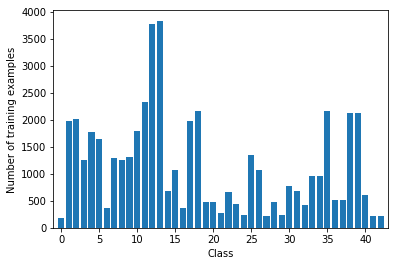


Image Shape: (32, 32, 1)
Number of Class are: 43

Training feature length:  49318
Training label length:  49318
Minimum class have examples have:  180
Variance of number of examples per class is: 801429.227691


In [10]:
##Visualize new train set

#classes histogram 
sign_classes, class_indices, class_counts2 = np.unique(newy_train, return_index = True, return_counts = True)
plt.bar( np.arange( 43 ), class_counts2 , align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

print()
print("Image Shape: {}".format(newX_train[0].shape))
print("Number of Class are:", nclass)
print()
print("Training feature length: ",len(newX_train))
print("Training label length: ",len(newy_train))

print("Minimum class have examples have: ", min(class_counts2))
print("Variance of number of examples per class is:", np.var(class_counts2))

In [11]:
###5- Generate Fake data for low counts classes (By rotation some data)

#rotation function
def rotateextend(X,y):
    print('Generating additional data...')
    angles = [-5, 5, -10, 10, -15, 15, -20, 20]
    
    inputs_per_class = np.bincount(y)
    max_inputs = np.max(inputs_per_class)
    
    for i in range(len(inputs_per_class)):
        input_ratio = min(int(max_inputs / inputs_per_class[i]) - 1, 7)
        if input_ratio <= 1:
            continue
        new_features = []
        new_labels = []
        mask = np.where(y == i)

    for j in range(input_ratio):
        for feature in X[mask]:
            new_features.append(ndimage.rotate(feature, angles[j], reshape=False))
            new_labels.append(i)

    X = np.append(X, new_features, axis=0)
    y = np.append(y, new_labels, axis=0)
    
    return (X,y)

xTrain , yTrain = rotateextend(newX_train , newy_train)
#xTrain , yTrain = rotateextend(sgsfX_train , sy_train)


Generating additional data...


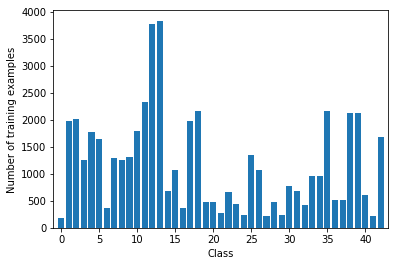


Image Shape: (32, 32, 1)
Number of Class are: 43

Training feature length:  50788
Training label length:  50788
Minimum class have examples have:  180
Variance of number of examples per class is: 786454.14927

sample after flib and rotate operations 
Class 0


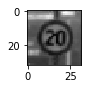

In [12]:
##Visualize new train set

#classes histogram 
sign_classes, class_indices, class_counts3 = np.unique(yTrain, return_index = True, return_counts = True)
plt.bar( np.arange( 43 ), class_counts3 , align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

print()
print("Image Shape: {}".format(xTrain[0].shape))
print("Number of Class are:", nclass)
print()
print("Training feature length: ",len(xTrain))
print("Training label length: ",len(yTrain))

print("Minimum class have examples have: ", min(class_counts3))
print("Variance of number of examples per class is:", np.var(class_counts3))

#sample after flib and rotate operations 
print()
image = xTrain[5].squeeze()
print("sample after flib and rotate operations ")
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

print("Class", yTrain[5])



sample after flib and rotate operations 
Class 22


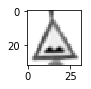

In [13]:

##After take samples I see that data need to shuffle to reduce bias
#shuffle train and valid sets
xTrain, yTrain = unison_shuffled_copies(xTrain, yTrain)

#sample after flib and rotate operations 
print()
image = xTrain[5].squeeze()
print("sample after flib and rotate operations ")
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

print("Class", yTrain[5])

### Model Architecture

In [14]:
EPOCHS = 100
BATCH_SIZE = 128


In [15]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
#add  reuse= True to variabe scope in case you need to run Lenet function more than one time
    with tf.variable_scope("conv1"):
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32    # 32*32*32
        conv1w = tf.get_variable( 'weight1',shape = [5,5,1,32],initializer = tf.contrib.layers.xavier_initializer())
        #conv1w = tf.Variable(tf.truncated_normal(shape=(5,5,1,32) , stddev= sigma , mean=mu))
        conv1b = tf.Variable(tf.zeros(32))
        conv1 = tf.nn.conv2d(input= x,
                             filter= conv1w,
                             strides=[1, 1, 1, 1],
                             padding='VALID') + conv1b
    
        # TODO: Activation.
        conv1 = tf.nn.relu(conv1)

        # TODO: Pooling. Input = 28x28x32. #32*32*32  Output = 14x14x32.   #16*16*32
        conv1 =  tf.nn.max_pool(value=conv1,
                                   ksize=[1, 2, 2, 1],
                                   strides=[1, 2, 2, 1],
                                   padding='VALID')
        conv1 = tf.nn.dropout(conv1, 0.9)
        
    
    with tf.variable_scope("conv2"):
    # TODO: Layer 2: Convolutional. Input = 14*14*32  #16*16*32  Output =10*10*64  #16x16x64.
        conv2w = tf.get_variable( 'weights2',shape = [5,5,32,64],initializer = tf.contrib.layers.xavier_initializer())
        #conv2w = tf.Variable(tf.truncated_normal(shape=(5,5,32,64) , stddev= sigma , mean=mu))
        conv2b = tf.Variable(tf.zeros(64))
        conv2 = tf.nn.conv2d(input= conv1,
                             filter= conv2w,
                             strides=[1, 1, 1, 1],
                             padding='VALID')  + conv2b
        # TODO: Activation.
        conv2 = tf.nn.relu(conv2)

        # TODO: Pooling. Input = 10x10x64.  #16*16*64 Output = 5x5x64 #8*8x64.
        conv2 =  tf.nn.max_pool(value=conv2,
                                   ksize=[1, 2, 2, 1],
                                   strides=[1, 2, 2, 1],
                                   padding='VALID')
        conv2 = tf.nn.dropout(conv2, 0.8)

    # TODO: Flatten. Input = 5x5x64. #8*8*64 Output = 1600.
    fc0 = flatten(conv2)
    
    with tf.variable_scope("fc1"):
    # TODO: Layer 3: Fully Connected. Input =1600 #4096. Output =480 #1200.
        fc1w = tf.get_variable( 'weight3',shape = [1600,480],initializer = tf.contrib.layers.xavier_initializer())
        #fc1w = tf.Variable(tf.truncated_normal(shape=(4096,1200) , stddev= sigma , mean=mu))
        fc1b = tf.Variable(tf.zeros(480))
        fc1 = tf.matmul(fc0,fc1w) + fc1b
    
        # TODO: Activation.
        fc1 = tf.nn.relu(fc1)
        fc1 = tf.nn.dropout(fc1, 0.7)

    with tf.variable_scope("fc2"):    
    # ToDO: Layer 4: Fully Connected. Input = 480 #1200. Output = 144 #360.
        fc2w = tf.get_variable( 'weight44',shape = [480,144],initializer = tf.contrib.layers.xavier_initializer())        
        #fc2w = tf.Variable(tf.truncated_normal(shape=(1200,360) , stddev= sigma , mean= mu))
        fc2b = tf.Variable(tf.zeros(144))
        fc2 = tf.matmul(fc1,fc2w) + fc2b

        # TODO: Activation.
        fc2 = tf.nn.relu(fc2)
        fc2 = tf.nn.dropout(fc2, 0.7)


    with tf.variable_scope("logits"):    
    # TODO: Layer 5: Fully Connected. Input = 144 #360. Output = 43 #43.
        fc3w = tf.get_variable( 'weight5',shape = [144,43],initializer = tf.contrib.layers.xavier_initializer())                
        #fc3w = tf.Variable(tf.truncated_normal(shape=(360,43) , stddev= sigma , mean= mu))
        fc3b = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2,fc3w) + fc3b
    return logits

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [17]:
rate = 0.0001

logits = LeNet(x)
prediction = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [20]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(xTrain)
    # Best validation accuracy seen so far.
    best_validation_accuracy = 0.0
    # Epoch-number for last improvement to validation accuracy.
    last_improvement = 0
    # Stop optimization if no improvement found in 10 Epoch
    require_improvement = 9
    # Counter for total number of iterations performed so far.
    noEpoch = 0
    print("Training...")
    print()
    for i in range(EPOCHS):
        xTrain, yTrain = shuffle(xTrain, yTrain)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xTrain[offset:end], yTrain[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(sX_valid, sy_valid)
            
        noEpoch +=1
        if validation_accuracy > best_validation_accuracy:
            # Update the best-known validation accuracy.
            best_validation_accuracy = validation_accuracy
                
            # Set the iteration for the last improvement to current.
            last_improvement = noEpoch
        
            saver.save(sess, 'lenet')
            improved_str = '*'
        else:
            # An empty string to be printed below.
            # Shows that no improvement was found.
            improved_str = ''
        if noEpoch - last_improvement > require_improvement:
            print("No improvement found in a while, stopping optimization.")

            # Break out from the for-loop.
            break
        print("EPOCH {0} ... {1}".format(i+1,improved_str))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
            
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ... *
Validation Accuracy = 0.359

EPOCH 2 ... *
Validation Accuracy = 0.552

EPOCH 3 ... *
Validation Accuracy = 0.646

EPOCH 4 ... *
Validation Accuracy = 0.717

EPOCH 5 ... *
Validation Accuracy = 0.755

EPOCH 6 ... *
Validation Accuracy = 0.790

EPOCH 7 ... *
Validation Accuracy = 0.810

EPOCH 8 ... *
Validation Accuracy = 0.850

EPOCH 9 ... *
Validation Accuracy = 0.853

EPOCH 10 ... *
Validation Accuracy = 0.862

EPOCH 11 ... *
Validation Accuracy = 0.879

EPOCH 12 ... 
Validation Accuracy = 0.874

EPOCH 13 ... *
Validation Accuracy = 0.892

EPOCH 14 ... 
Validation Accuracy = 0.890

EPOCH 15 ... *
Validation Accuracy = 0.894

EPOCH 16 ... *
Validation Accuracy = 0.899

EPOCH 17 ... *
Validation Accuracy = 0.908

EPOCH 18 ... 
Validation Accuracy = 0.898

EPOCH 19 ... 
Validation Accuracy = 0.905

EPOCH 20 ... *
Validation Accuracy = 0.910

EPOCH 21 ... *
Validation Accuracy = 0.915

EP

In [21]:
##Prepare test set to evaluation (preporceed test set)
#grayscale
X_test = 0.299 * X_test[:, :, :, 0] + 0.587 * X_test[:, :, :, 1] + 0.114 * X_test[:, :, :, 2]

#feature scale
X_test = (X_test / 255.).astype(np.float32)

#reshabe feature ((32,32) result from grayscale) to (32,32,1) to be accepted in CNN 
X_test = X_test.reshape(X_test.shape + (1,))

In [22]:

##accuracy on test set 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.922


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os,sys
from PIL import Image

img1 = Image.open("newimages/0.ppm")
img1 = np.array(img1)
img1 = 0.299 * img1[:, :, 0] + 0.587 * img1[:, :, 1] + 0.114 * img1[:, :, 2]
img1 = (img1 / 255.).astype(np.float32)
img1 = np.lib.pad(img1[:,:], (1,), 'constant', constant_values=(0)) 
img1 = img1.reshape(img1.shape + (1,)) 
print(img1.shape)

img2 = Image.open("newimages/1.ppm")
img2 = np.array(img2)
img2 = 0.299 * img2[:, :, 0] + 0.587 * img2[:, :, 1] + 0.114 * img2[:, :, 2]
img2 = (img2 / 255.).astype(np.float32)
img2 = np.lib.pad(img2[:,:], (1,), 'constant', constant_values=(0)) 
img2 = img2.reshape(img2.shape + (1,)) 
print(img2.shape)


img3 = Image.open("newimages/14.ppm")
img3 = np.array(img3)
img3 = 0.299 * img3[:, :, 0] + 0.587 * img3[:, :, 1] + 0.114 * img3[:, :, 2]
img3 = (img3 / 255.).astype(np.float32)
img3 = np.lib.pad(img3[:,:], (1,), 'constant', constant_values=(0)) 
img3 = img3.reshape(img3.shape + (1,)) 
print(img3.shape)

img4 = Image.open("newimages/28.ppm")
img4 = np.array(img4)
img4 = 0.299 * img4[:, :, 0] + 0.587 * img4[:, :, 1] + 0.114 * img4[:, :, 2]
img4 = (img4 / 255.).astype(np.float32)
img4 = np.lib.pad(img4[:,:], (1,), 'constant', constant_values=(0)) 
img4 = img4.reshape(img4.shape + (1,)) 
print(img4.shape)


img5 = Image.open("newimages/38.ppm")
img5 = np.array(img5)
img5 = 0.299 * img5[:, :, 0] + 0.587 * img5[:, :, 1] + 0.114 * img5[:, :, 2]
img5 = (img5 / 255.).astype(np.float32)
img5 = np.lib.pad(img5[:,:], (1,), 'constant', constant_values=(0)) 
img5 = img5.reshape(img5.shape + (1,)) 
print(img5.shape)

(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)


(5, 32, 32, 1)


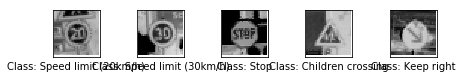

In [20]:

#new images Test set
newtest = np.stack((img1,img2,img3,img4,img5))
ynewtest = np.array((0,1,14,28,38))

#plot new examples after preocesed 
partnew = newtest[0:5]
xx = partnew[:,:,:,-1]
print(newtest.shape)
plot_images(images= newtest[:,:,:,-1], cls_true= ynewtest)



### Predict the Sign Type for Each Image

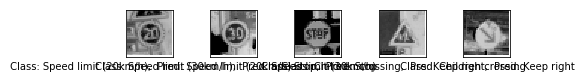

True      ['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Stop' 'Children crossing'
 'Keep right']
Predicted ['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Stop' 'Children crossing'
 'Keep right']


In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_images_dict = {x: newtest}

    
    new_prediction = sess.run(prediction, feed_dict=new_images_dict)
    newpred = tf.argmax(new_prediction,1)
    newimagepred = sess.run(newpred,feed_dict=new_images_dict)
    plot_images(images = newtest[:,:,:,-1] , cls_true= ynewtest, cls_pred= newimagepred)
    print("True     ",signnames.values[ynewtest,1])
    print("Predicted",signnames.values[newimagepred,1])
    


### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    correct= (newimagepred== ynewtest)
    correct= correct.astype(float)
    print("Accuracy of prediction new images is: ",np.mean(correct)*100,"%")

    

Accuracy of prediction new images is:  100.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  9.99941349e-01,   4.99665257e-05,   7.36317816e-06,
          7.84437020e-07,   3.98280150e-07],
       [  9.99677777e-01,   2.55233055e-04,   5.24519164e-05,
          1.45828153e-05,   3.55378171e-09],
       [  9.98184979e-01,   4.85186785e-04,   4.82022297e-04,
          2.75808008e-04,   2.53100996e-04],
       [  9.98709321e-01,   1.18934806e-03,   7.69850521e-05,
          1.72382934e-05,   3.07839764e-06],
       [  9.99989271e-01,   2.73049477e-06,   2.48695005e-06,
          1.64960761e-06,   1.10545761e-06]], dtype=float32), indices=array([[ 0,  1,  6,  4, 21],
       [ 1,  0,  4,  2,  5],
       [14, 33, 17, 34, 15],
       [28, 30, 23, 29, 24],
       [38, 13,  5,  2,  1]], dtype=int32))


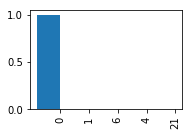

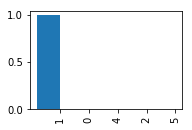

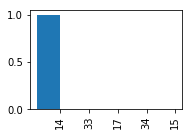

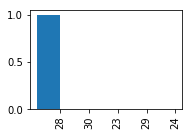

In [100]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import pylab as pl
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #print(new_prediction.shape)
    top5prop = sess.run(tf.nn.top_k(tf.constant(new_prediction), k=5))  
    print(top5prop)
    
    for i in range(4):
        fig = pl.figure()
        ax = pl.subplot(222)
        ax.bar(range(len(top5prop[1][i])), top5prop[0][i])
        width=0.8
        ax.set_xticks(np.arange(len(top5prop[1][i])) + width/2)
        ax.set_xticklabels(top5prop[1][i], rotation=90)


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 